In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers 

import xgboost as xgb

%matplotlib inline

In [2]:
#check tensorflow version
print(tf.__version__)

2.0.0


# Data Loading and Preparation

## Load Data

In [3]:
# Read CSV Data with no header
data = pd.read_csv('../data/form_data.csv', header=0)

In [4]:
# Explore data format
data.head()

,0,1,2,3
0,(3373373,22,16,1.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0....
1,(12980356,66,22,0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0....
2,(9875184,45,38,0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-4.0-0.0-0.0-0....
3,(3332535,172,69,0.0-1.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0....
4,(11907745,88,70,0.0-1.0-0.0-0.0-0.0-0.0-0.0-0.0-1.0-0.0-1.0-0....


In [5]:
# Data dimensions
data.shape

(200000, 4)

In [6]:
# Remove na's in the data
data.dropna(inplace=True)

In [7]:
# Let's explore the last field
print('Original data: ', data['3'][0])

# Se see that there is a ')' at the end of the field. Let's remove it
data['3'] = data['3'].str.replace(')', '')

# Check it is properly removed
print(' Clean data: ', data['3'][0])

Original data:  1.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-1.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-1.0-1.0-0.0-0.0-0.0-0.0)
 Clean data:  1.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-1.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-1.0-1.0-0.0-0.0-0.0-0.0


In [8]:
# Let's expand the 3rd field into separate features
features = data['3'].str.split("-", expand = True) 
features.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Let's compute the true value of the completion rate
completion_rate = pd.DataFrame(data['2'] / data['1'])
completion_rate.head()

,0
0,0.727273
1,0.333333
2,0.844444
3,0.401163
4,0.795455


In [10]:
# Build training and tests sets (test set = 20% of the data)
X_train, X_test, y_train, y_test = train_test_split(features, completion_rate, test_size=0.2, random_state=0)

X_train = X_train[0:80000]
X_test = X_test[0:20000]
y_train = y_train[0:80000]
y_test = y_test[0:20000]

# Model training and evaluation

## Model 1: Simple Linear Regression

In [11]:
# Load model
regressor = LinearRegression()  

# Train model
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Print model parameters
# Intercept:
print(regressor.intercept_)
# Slope:
print(regressor.coef_)

[0.53652544]
[[-0.00897615 -0.02005406 -0.01117048 -0.14551775  0.0053481  -0.00336229
  -0.00437771 -0.08830561 -0.03056876 -0.02821663 -0.0120115  -0.04113209
  -0.01938221 -0.0022685  -0.13174299 -0.00848859 -0.02321088 -0.00154462
  -0.01139091 -0.18616816  0.01180024 -0.00782755 -0.00438865 -0.00176112
  -0.00133596 -0.03931523  0.01041335 -0.0087821  -0.00283187  0.0020671
  -0.00325707 -0.00273884  0.01393939 -0.00336229 -0.01522355  0.00657695
  -0.00489412 -0.00631861 -0.0057531   0.00207612 -0.00341666 -0.00367355
   0.00215205 -0.02837544  0.00209051 -0.00066601  0.00024937]]


In [13]:
# Make predictions
y_pred = regressor.predict(X_test)

# Inspect predictions
compare_completion_rates = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
compare_completion_rates.head()

,Actual,Predicted
0,0.607595,0.609404
1,0.450271,0.567163
2,0.783784,0.488450
3,0.833333,0.517757
4,0.829885,0.527898


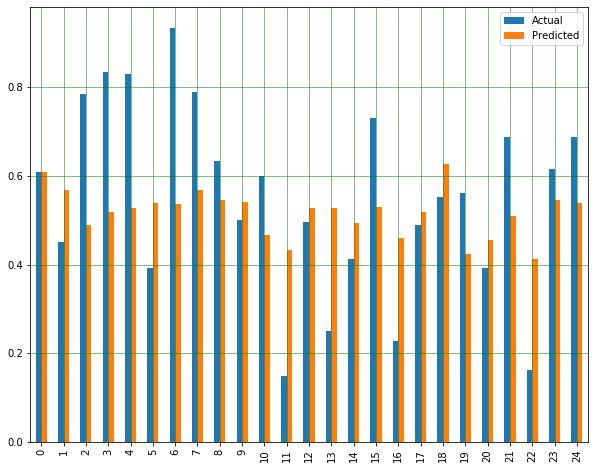

In [14]:
# Plot actual vs predicted values
compare_completion_rates.head(25).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [15]:
# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.17731768136444176
Mean Squared Error: 0.04675636010647983
Root Mean Squared Error: 0.2162321902642616


In [16]:
# Bonus: Check that scaling the data does not improve model's performance
# Load scaler
scaler = MinMaxScaler().fit(X_train)

# Scale data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Load and train a new model
regressor_scaled = LinearRegression()
regressor_scaled.fit(X_train_scaled, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Make predictions
y_pred_scaled = regressor_scaled.predict(X_test_scaled)

In [19]:
# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_scaled))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_scaled))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_scaled)))

Mean Absolute Error: 0.17731768136444176
Mean Squared Error: 0.04675636010647983
Root Mean Squared Error: 0.2162321902642616


## Model 2: XGBoost

In [20]:
# Define model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1, 
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

# Train model
xg_reg.fit(X_train.values, y_train.values)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [21]:
# Make predictions
y_pred_xg = xg_reg.predict(X_test.values)

In [22]:
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xg))
print("RMSE: {}".format(rmse))

RMSE: 0.21486280998193988


In [23]:
# Perform cross validation
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5, 
          'alpha': 10}

data_dmatrix = xgb.DMatrix(pd.concat([X_train, X_test]).values, label=pd.concat([y_train, y_test]).values)

cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=3,
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

In [24]:
# Display results
cv_results.head()
print((cv_results["test-rmse-mean"]).tail(1))

49    0.210778
Name: test-rmse-mean, dtype: float64


## Model 3: Tensorflow Regression model

In [25]:
# Define function to build the model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

    return model

# Display training progress by printing number of epoch
class PrintEpoch(keras.callbacks.Callback):
    
    def __init__(self, total_epochs):
        self.epoch = 0
        self.total_epochs = total_epochs
        
    def on_epoch_end(self, epoch, logs):
        self.epoch += 1

        if self.epoch % 10 == 0:
            print('Epoch {} out of {}'.format(self.epoch, self.total_epochs))


def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0.15,0.2])
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,0.1])
    plt.legend()
    plt.show()


EPOCHS = 80

In [26]:
# Build and display the model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3072      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 7,297
Trainable params: 7,297
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Check the model works with a small data sample
example_batch = X_train_scaled[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.00737463],
       [ 0.00348328],
       [ 0.00562832],
       [-0.01545651],
       [-0.00318698],
       [ 0.00267597],
       [ 0.00608117],
       [ 0.00483084],
       [ 0.00242585],
       [-0.02429553]], dtype=float32)

In [28]:
# Train model
history = model.fit(
  pd.DataFrame(X_train), pd.DataFrame(y_train),
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintEpoch(EPOCHS)])

Epoch 10 out of 80
Epoch 20 out of 80
Epoch 30 out of 80
Epoch 40 out of 80
Epoch 50 out of 80
Epoch 60 out of 80
Epoch 70 out of 80
Epoch 80 out of 80


In [29]:
# Recover metrics for each epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,0.097381,0.205350,0.097381,0.050276,0.180057,0.050276,0
1,0.056555,0.179234,0.056555,0.048598,0.176154,0.048598,1
2,0.051251,0.174912,0.051251,0.045437,0.173778,0.045436,2
3,0.046152,0.173591,0.046152,0.048238,0.174583,0.048238,3
4,0.047196,0.172965,0.047196,0.045864,0.173705,0.045864,4
...,...,...,...,...,...,...,...
75,0.042711,0.166021,0.042711,0.048205,0.176565,0.048205,75
76,0.042736,0.165914,0.042736,0.048023,0.176787,0.048023,76
77,0.042763,0.165854,0.042763,0.047869,0.176267,0.047869,77
78,0.042604,0.165874,0.042604,0.049112,0.177249,0.049112,78


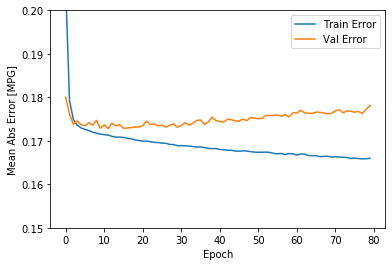

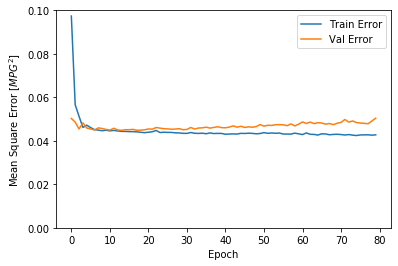

In [30]:
plot_history(history)

In [31]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.5f}".format(mae))
print("Testing set Mean Squared Error: {:5.5f}".format(mse))
print("Testing set Root Mean Squared Error: {:5.5f}".format(np.sqrt(mse)))

20000/20000 - 0s - loss: 0.0479 - mae: 0.1763 - mse: 0.0479
Testing set Mean Abs Error: 0.17628
Testing set Mean Squared Error: 0.04795
Testing set Root Mean Squared Error: 0.21897
